In [15]:
# Bring in the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Bring in the csv to work from
grouped_df = pd.read_csv(r"resources/grouped_df.csv")

In [16]:
# Check the csv
grouped_df

,State,County,Population,Poverty Count,Hispanic or Latino,White Alone,JobsReported
0,KS,Allen,13064.0,2141.0,395.0,12179.0,195
1,KS,Anderson,8210.0,1040.0,14.0,7855.0,116
2,KS,Atchison,16548.0,2567.0,449.0,15049.0,240
3,KS,Barber,4407.0,488.0,96.0,4253.0,167
4,KS,Barton,27808.0,3774.0,3777.0,25561.0,782
...,...,...,...,...,...,...,...
215,MO,Washington,22909.0,5372.0,191.0,21857.0,108
216,MO,Wayne,13956.0,2881.0,145.0,13584.0,156
217,MO,Webster,31736.0,5918.0,605.0,30452.0,431
218,MO,Worth,2206.0,273.0,23.0,2185.0,30


In [17]:
# Add some derived rows to do some quick analytics on
grouped_df["Poverty Rate"] = round(grouped_df["Poverty Count"] / grouped_df["Population"] * 100,2)
grouped_df["Job Impact"] = round(grouped_df["JobsReported"] / grouped_df["Population"] * 100,2)
grouped_df["Percent Hispanic"] = round(grouped_df["Hispanic or Latino"] / grouped_df["Population"] * 100,2)
grouped_df["Percent Non-White"] = round(100 - grouped_df["White Alone"] / grouped_df["Population"] * 100,2)
grouped_df

,State,County,Population,Poverty Count,Hispanic or Latino,White Alone,JobsReported,Poverty Rate,Job Impact,Percent Hispanic,Percent Non-White
0,KS,Allen,13064.0,2141.0,395.0,12179.0,195,16.39,1.49,3.02,6.77
1,KS,Anderson,8210.0,1040.0,14.0,7855.0,116,12.67,1.41,0.17,4.32
2,KS,Atchison,16548.0,2567.0,449.0,15049.0,240,15.51,1.45,2.71,9.06
3,KS,Barber,4407.0,488.0,96.0,4253.0,167,11.07,3.79,2.18,3.49
4,KS,Barton,27808.0,3774.0,3777.0,25561.0,782,13.57,2.81,13.58,8.08
...,...,...,...,...,...,...,...,...,...,...,...
215,MO,Washington,22909.0,5372.0,191.0,21857.0,108,23.45,0.47,0.83,4.59
216,MO,Wayne,13956.0,2881.0,145.0,13584.0,156,20.64,1.12,1.04,2.67
217,MO,Webster,31736.0,5918.0,605.0,30452.0,431,18.65,1.36,1.91,4.05
218,MO,Worth,2206.0,273.0,23.0,2185.0,30,12.38,1.36,1.04,0.95


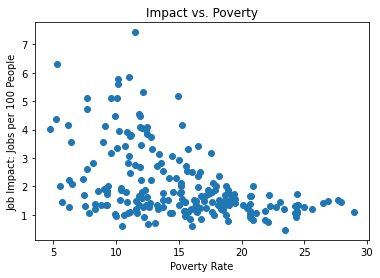

In [18]:
# Compare the poverty rate (a percentage) against the number of jobs added per 100 people in the county
# This shows is striking trend
plt.scatter(x=grouped_df["Poverty Rate"],y=grouped_df["Job Impact"])
plt.xlabel("Poverty Rate")
plt.ylabel("Job Impact: Jobs per 100 People")
plt.title("Impact vs. Poverty")
plt.show()

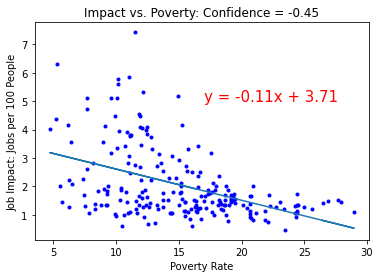

In [21]:
# Rerun the above scatter but with a trend line. The confidence interval is not overwhelming, but the trend is notable.
# The poorer the county, the less help was received from PPP loans
(slope, intercept, rvalue, pvalue, stderr) = linregress(grouped_df["Poverty Rate"],grouped_df["Job Impact"])
regress_values = grouped_df["Poverty Rate"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(grouped_df["Poverty Rate"],grouped_df["Job Impact"],marker=".",color="blue")
plt.plot(grouped_df["Poverty Rate"],regress_values)
plt.annotate(line_eq,(17,5),fontsize=15,color="red")
plt.xlabel("Poverty Rate")
plt.ylabel("Job Impact: Jobs per 100 People")
plt.title("Impact vs. Poverty: Confidence = " + 
          str(round(st.pearsonr(grouped_df["Poverty Rate"],grouped_df["Job Impact"])[0],2)))
plt.show()

In [22]:
# Split the data by state
kansas_df = grouped_df.query("State == 'KS'")
missouri_df = grouped_df.query("State == 'MO'")

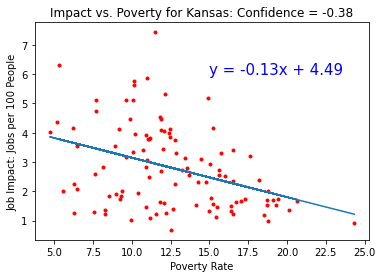

In [24]:
# Run the regression for Kansas. The trend line is still pronounced
(slope, intercept, rvalue, pvalue, stderr) = linregress(kansas_df["Poverty Rate"],kansas_df["Job Impact"])
regress_values = kansas_df["Poverty Rate"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(kansas_df["Poverty Rate"],kansas_df["Job Impact"],marker=".",color="red")
plt.plot(kansas_df["Poverty Rate"],regress_values)
plt.annotate(line_eq,(15,6),fontsize=15,color="blue")
plt.xlabel("Poverty Rate")
plt.ylabel("Job Impact: Jobs per 100 People")
plt.title("Impact vs. Poverty for Kansas: Confidence = " + 
          str(round(st.pearsonr(kansas_df["Poverty Rate"],kansas_df["Job Impact"])[0],2)))
plt.show()

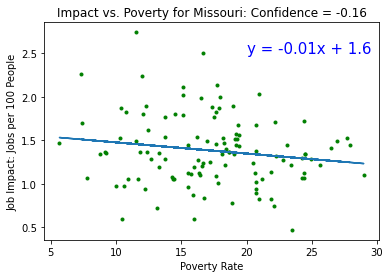

In [26]:
# Run the trend line for Missouri. Remarkably, there is essentially no correlation.
(slope, intercept, rvalue, pvalue, stderr) = linregress(missouri_df["Poverty Rate"],missouri_df["Job Impact"])
regress_values = missouri_df["Poverty Rate"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(missouri_df["Poverty Rate"],missouri_df["Job Impact"],marker=".",color="green")
plt.plot(missouri_df["Poverty Rate"],regress_values)
plt.annotate(line_eq,(20,2.5),fontsize=15,color="blue")
plt.xlabel("Poverty Rate")
plt.ylabel("Job Impact: Jobs per 100 People")
plt.title("Impact vs. Poverty for Missouri: Confidence = " + 
          str(round(st.pearsonr(missouri_df["Poverty Rate"],missouri_df["Job Impact"])[0],2)))
plt.show()